In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("data/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

This says that there are no missing values in the dataset.

In [7]:
df.duplicated().sum()

0

No duplicate values in the dataset as well


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

There are so many unique values in the dataset

In [14]:
print('Categories present in gender variable:',end=" ")
print(df['gender'].unique())

print('Categories present in race and ethnicity variable:',end=" ")
print(df['race/ethnicity'].unique())

print('Categories present in parental level of education variable:',end=" ")
print(df['parental level of education'].unique())

print('Categories present in test prep course variable:',end=" ")
print(df['test preparation course'].unique())



Categories present in gender variable: ['female' 'male']
Categories present in race and ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories present in parental level of education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories present in test prep course variable: ['none' 'completed']


In [15]:
numeric_features= [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']

print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features:{}'.format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features:['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


So, in the dataset, we have 3 different score, now we'll be finding the total score and the average of all the 3 scores.

In [16]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
df['average'].value_counts()

average
68.000000    15
66.000000    14
77.333333    14
68.333333    13
70.000000    12
             ..
92.333333     1
31.666667     1
37.333333     1
9.000000      1
18.333333     1
Name: count, Length: 194, dtype: int64

From here, we can possibly say that, most of the student's average is in between 65-70


In [20]:
reading_full=df[df['reading score']==100]['average'].count()
writing_full=df[df['writing score']==100]['average'].count()
math_full=df[df['math score']==100]['average'].count()

print(f'Number of students who scored full in maths:{math_full}')
print(f'Number of students who scored full in writing:{writing_full}')
print(f'Number of students who scored full in reading:{reading_full}')

Number of students who scored full in maths:7
Number of students who scored full in writing:14
Number of students who scored full in reading:17


In [21]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333
999,female,group D,some college,free/reduced,none,77,86,86,249,83.000000


Based on the data, there are around 1000 records, and only 7 scored full in maths, 14 in writing, and 17 in reading, that indicates, only 0.007% full in maths, 0.014% in writing and 0.017% in reading.

In [22]:
reading_less_20=df[df['reading score']<=20]['average'].count()
writing_less_20=df[df['writing score']<=20]['average'].count()
math_less_20=df[df['math score']<=20]['average'].count()

print(f'Number of students who scored below 20 in math:{math_less_20}')
print(f'Number of students who scored below 20 in reading: {reading_less_20}')
print(f'Number of students who scored below 20 in writing:{writing_less_20}')


Number of students who scored below 20 in math:4
Number of students who scored below 20 in reading: 1
Number of students who scored below 20 in writing:3


Considering this piece of information, almost everyone passed, and also, math is the worst performed by students, and the best performed is reading

<function matplotlib.pyplot.show(close=None, block=None)>

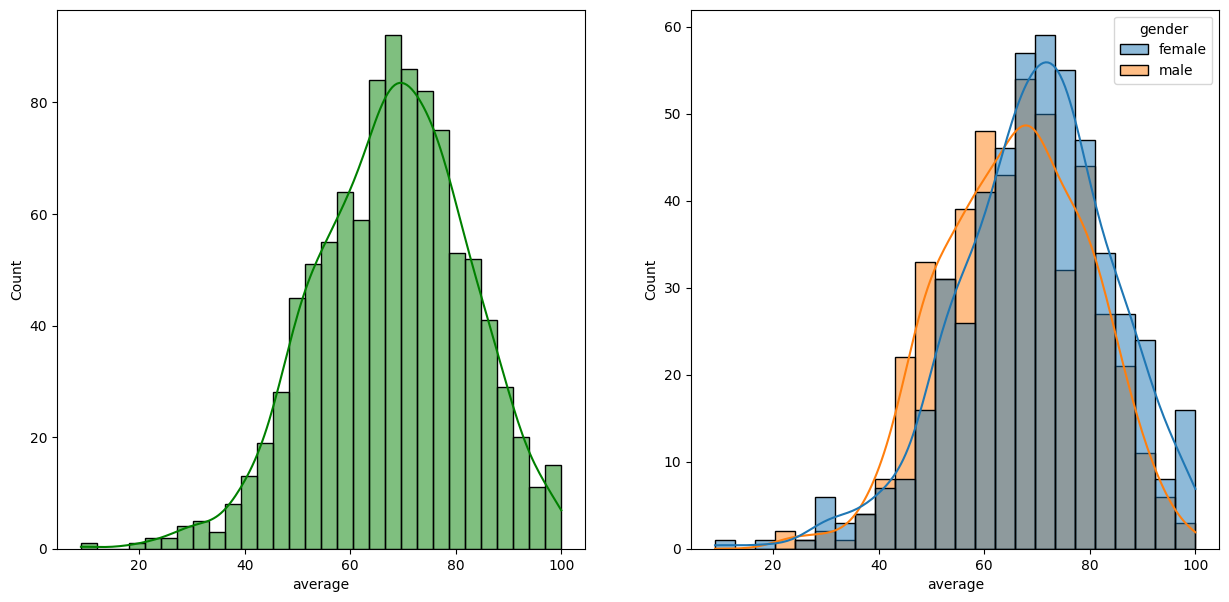

In [23]:
fig, axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show

This graph says that, females perform more better than males 

In [24]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<function matplotlib.pyplot.show(close=None, block=None)>

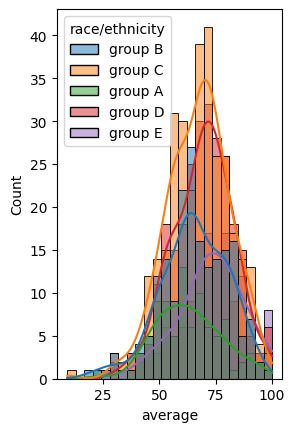

In [26]:
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.show

According to this,group C has the highest number of students in average range and group A has the least number of students. 

In [27]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [41]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

Only 358 students completed the test preparation course

In [44]:
df[df['test preparation course']=="completed"]['average']

1      82.333333
6      91.666667
8      65.000000
13     73.333333
18     44.666667
         ...    
990    80.666667
991    75.000000
995    94.000000
997    65.000000
998    74.333333
Name: average, Length: 358, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

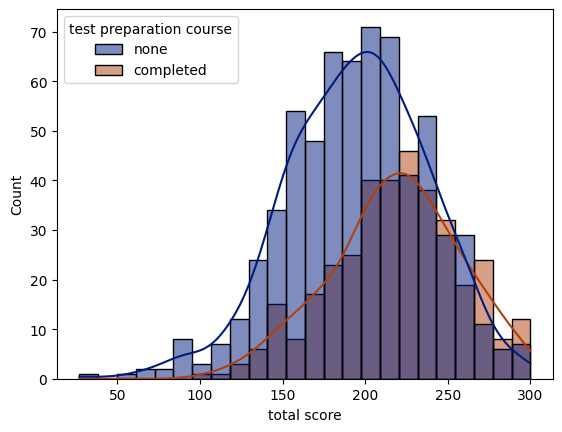

In [49]:

sns.histplot(data=df,x='total score',kde=True,hue='test preparation course',palette='dark')
plt.show

Considering the total score, the number of students who completed the test preparation course, are at a higher stake of getting a 100%, but the number of people getting around 200 is more in number in case of "none" but that is because of the count difference of both none and completed, none being around the double amount of students than completed.